In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter
import matplotlib.pyplot as plt

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "ltspice_filter_demo/filter_circuit.asc"


Found Numpy. WIll be used for storing data


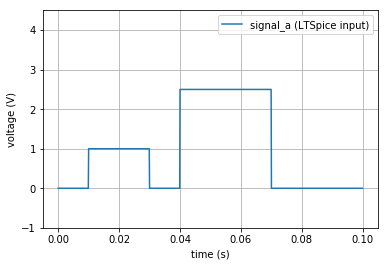

In [2]:
##################################################
##             generate test signal             ##
##################################################

# our samples shall be 100 ms wide
sample_width=100e-3
# time step between samples: 0.1 ms
delta_t=0.1e-3
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

# we want 1 V between 10 ms and 30 ms, and 2.5 V between 40 and 70 ms
signal_a = 0 + 1*((time > 10e-3) * (time < 30e-3)) + 2.5*((time > 40e-3) * (time < 70e-3))

plt.plot(time,signal_a, label="signal_a (LTSpice input)")
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.ylim((-1,4.5))
plt.grid(True)

plt.legend()
plt.show()


In [3]:
##################################################
##        apply filter - configuration 1        ##
##################################################

# all values in SI units
configuration_1 = {
  "C":100e-6, # 100 uF
  "L":200e-3 # 200 mH
}

dummy, signal_b1 = apply_ltspice_filter(
      circuit_file,
      time, signal_a,
      params=configuration_1,
      ltspice_command = ltspice_command
      )


sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access


In [4]:
##################################################
##        apply filter - configuration 2        ##
##################################################

configuration_2 = {
  "C":50e-6, # 50 uF
  "L":300e-3 # 300 mH
}

dummy, signal_b2 = apply_ltspice_filter(
      circuit_file,
      time, signal_a,
      params=configuration_2,
      ltspice_command = ltspice_command
      )


sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access


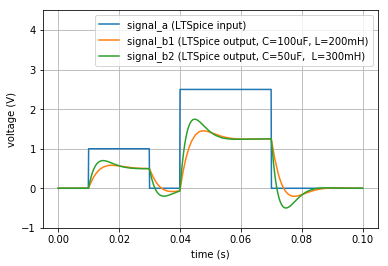

In [5]:
##################################################
##           plot input vs output(s)            ##
##################################################
  
plt.plot(time,signal_a, label="signal_a (LTSpice input)")
plt.plot(time,signal_b1, label="signal_b1 (LTSpice output, C=100uF, L=200mH)")
plt.plot(time,signal_b2, label="signal_b2 (LTSpice output, C=50uF,  L=300mH)")
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.ylim((-1,4.5))
plt.grid(True)

plt.legend()
plt.show()